# The Twitter Sentiment Analysis 

## Live Twitter access

In [1]:
import tweepy
from textblob import TextBlob

In [2]:
Feedback1 = " The food radison was awesome"
Feedback2 = " The food radison was very good"
blob1 = TextBlob(Feedback1)
blob2 = TextBlob(Feedback2)
print(blob1.sentiment)
print(blob2.sentiment)

Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.9099999999999999, subjectivity=0.7800000000000001)


In [3]:
consumer_key = "sJ0xY5tfUZRFRHl5wDWT2SmOM"
consumer_secret = "E9DQrM8ewLLOQvoQqIabPBUcd6LFb3h9K1FesmYQBNJdfO5tgn"
access_token = "3029199943-TMrOm7EG9P9kJ5GEhXEQhKkac26WhiY7jpLez0s"
access_token_secret = "ZbtMN91bYnvxwl2yAvzBq5zm7fANabA39HU0TnVkXP5vj"

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [8]:
public_tweets = api.search("covid19")
for tweet in public_tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)

RT @RFoster504: I know Covid19 confused AF right now.
Sentiment(polarity=-0.05714285714285716, subjectivity=0.6178571428571429)
Check out this amazing video by some of Latin America’s hottest artists. Every view helps raise 💰money💰 for the Pan… https://t.co/eL94b1rlCZ
Sentiment(polarity=0.6000000000000001, subjectivity=0.9)
భారత్ లో పెరిగిన కరోనా కేసులు..
https://t.co/bfERWYcsSz
#Telangana #coronavirus #COVID19
Sentiment(polarity=0.0, subjectivity=0.0)
RT @CanPaedSociety: ICYMI: Webinar on "Paediatric Inflammatory Multisystem Syndrome (PIMS) and #COVID19" with experts from @ChuSteJustine @…
Sentiment(polarity=0.0, subjectivity=0.0)
@CiudadanosPMx @jelozgalvan Es importante que los #Coronados tomen seriedad porque hay otras prioridades.

#Covid19_mx
Sentiment(polarity=0.0, subjectivity=0.0)
RT @MORUBKK: The results of @MRMehraMD et al in @TheLancet have had a massive impact on public health practice &amp; research, halted trials, w…
Sentiment(polarity=0.0, subjectivity=0.533333333333333

### Example 2

In [1]:
from tweepy import API
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

import twitter_credentials
import numpy as np
import pandas as pd

In [2]:
# # # # TWITTER CLIENT # # # #
class TwitterClient:
    def __init__(self, twitter_user=None):
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)

        self.twitter_user = twitter_user

    def get_twitter_client_api(self):
        return self.twitter_client

    def get_user_timeline_tweets(self, num_tweets):
        tweets = []
        for tweet in Cursor(
            self.twitter_client.user_timeline, id=self.twitter_user
        ).items(num_tweets):
            tweets.append(tweet)
        return tweets

    def get_friend_list(self, num_friends):
        friend_list = []
        for friend in Cursor(self.twitter_client.friends, id=self.twitter_user).items(
            num_friends
        ):
            friend_list.append(friend)
        return friend_list

    def get_home_timeline_tweets(self, num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(
            self.twitter_client.home_timeline, id=self.twitter_user
        ).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets

In [3]:
# # # # TWITTER AUTHENTICATER # # # #
class TwitterAuthenticator:
    def authenticate_twitter_app(self):
        auth = OAuthHandler(
            twitter_credentials.CONSUMER_KEY, twitter_credentials.CONSUMER_SECRET
        )
        auth.set_access_token(
            twitter_credentials.ACCESS_TOKEN, twitter_credentials.ACCESS_TOKEN_SECRET
        )
        return auth

In [4]:
# # # # TWITTER STREAMER # # # #
class TwitterStreamer:
    """
    Class for streaming and processing live tweets.
    """

    def __init__(self):
        self.twitter_autenticator = TwitterAuthenticator()

    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        # This handles Twitter authetification and the connection to Twitter Streaming API
        listener = TwitterListener(fetched_tweets_filename)
        auth = self.twitter_autenticator.authenticate_twitter_app()
        stream = Stream(auth, listener)

        # This line filter Twitter Streams to capture data by the keywords:
        stream.filter(track=hash_tag_list)

In [5]:
# # # # TWITTER STREAM LISTENER # # # #
class TwitterListener(StreamListener):
    """
    This is a basic listener that just prints received tweets to stdout.
    """

    def __init__(self, fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename

    def on_data(self, data):
        try:
            print(data)
            with open(self.fetched_tweets_filename, "a") as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("Error on_data %s" % str(e))
        return True

    def on_error(self, status):
        if status == 420:
            # Returning False on_data method in case rate limit occurs.
            return False
        print(status)

In [6]:
class TweetAnalyzer:
    """
    Functionality for analyzing and categorizing content from tweets.
    """

    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=["Tweets"])

        df["id"] = np.array([tweet.id for tweet in tweets])
        df["len"] = np.array([len(tweet.text) for tweet in tweets])
        df["date"] = np.array([tweet.created_at for tweet in tweets])
        df["source"] = np.array([tweet.source for tweet in tweets])
        df["likes"] = np.array([tweet.favorite_count for tweet in tweets])
        df["retweets"] = np.array([tweet.retweet_count for tweet in tweets])

        return df

In [7]:
if __name__ == "__main__":

    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()

    api = twitter_client.get_twitter_client_api()

    tweets = api.user_timeline(screen_name="realDonaldTrump", count=20)

    # print(dir(tweets[0]))
    # print(tweets[0].retweet_count)

    df = tweet_analyzer.tweets_to_data_frame(tweets)

    print(df.head(10))

                                              Tweets                   id  \
0  RT @ScottAdamsSays: Malaria drug and zinc, the...  1266571665204527109   
1  RT @YoungDems4Trump: In Democrat cities you ca...  1266570449431003138   
2  RT @YoungDems4Trump: So sad. This poor busines...  1266570411678019584   
3   Time for a change! #2020 https://t.co/AECy2GBfys  1266570099454103553   
4  RT @TallahForTrump: Trump spoke at my church i...  1266569778770182151   
5  RT @TheRightMelissa: In an ironic twist of fat...  1266569597689438215   
6  RT @Jim_Jordan: Right on! \n\nWe don’t have to...  1266568994242260992   
7  RT @Scavino45: “Texas AG Ken Paxton: Trump is ...  1266568894568955909   
8  RT @Jim_Jordan: Twitter “fact checks” Presiden...  1266568857201913862   
9  RT @WhiteHouse: "I want to express our Nation'...  1266490262181818371   

   len                date              source  likes  retweets  
0   98 2020-05-30 03:26:31  Twitter for iPhone      0      4019  
1  139 2020-05-30 03

In [8]:
import matplotlib.pyplot as plt

In [9]:
# Get average length over all tweets:
print(np.mean(df["len"]))

111.55


In [11]:
# Get the number of likes for the most liked tweet:
print(np.max(df["likes"]))

669853


In [13]:
# Get the number of retweets for the most retweeted tweet:
print(np.max(df["retweets"]))

134646


In [14]:
print(df.head(10))

                                              Tweets                   id  \
0  RT @ScottAdamsSays: Malaria drug and zinc, the...  1266571665204527109   
1  RT @YoungDems4Trump: In Democrat cities you ca...  1266570449431003138   
2  RT @YoungDems4Trump: So sad. This poor busines...  1266570411678019584   
3   Time for a change! #2020 https://t.co/AECy2GBfys  1266570099454103553   
4  RT @TallahForTrump: Trump spoke at my church i...  1266569778770182151   
5  RT @TheRightMelissa: In an ironic twist of fat...  1266569597689438215   
6  RT @Jim_Jordan: Right on! \n\nWe don’t have to...  1266568994242260992   
7  RT @Scavino45: “Texas AG Ken Paxton: Trump is ...  1266568894568955909   
8  RT @Jim_Jordan: Twitter “fact checks” Presiden...  1266568857201913862   
9  RT @WhiteHouse: "I want to express our Nation'...  1266490262181818371   

   len                date              source  likes  retweets  
0   98 2020-05-30 03:26:31  Twitter for iPhone      0      4019  
1  139 2020-05-30 03

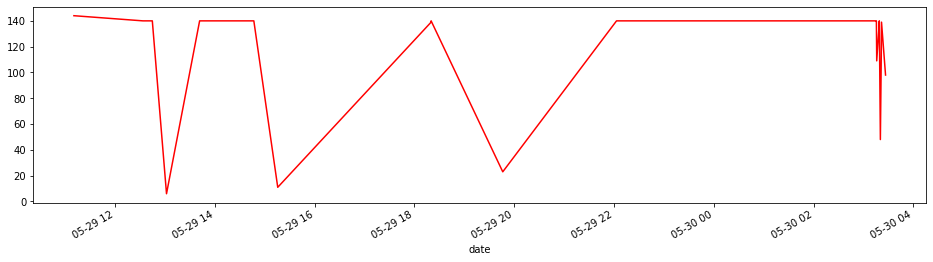

In [15]:
# Time Series
time_likes = pd.Series(data=df["len"].values, index=df["date"])
time_likes.plot(figsize=(16, 4), color="r")
plt.show()

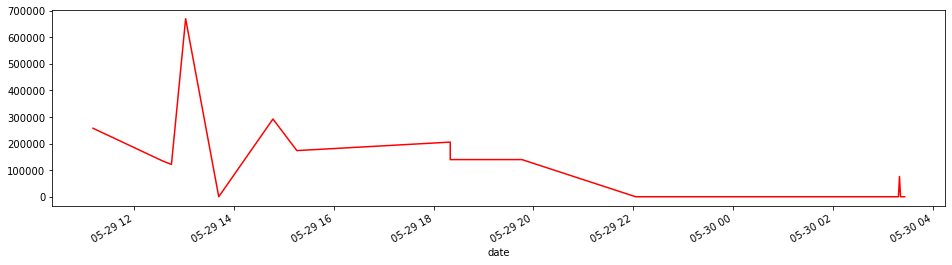

In [16]:
time_favs = pd.Series(data=df["likes"].values, index=df["date"])
time_favs.plot(figsize=(16, 4), color="r")
plt.show()

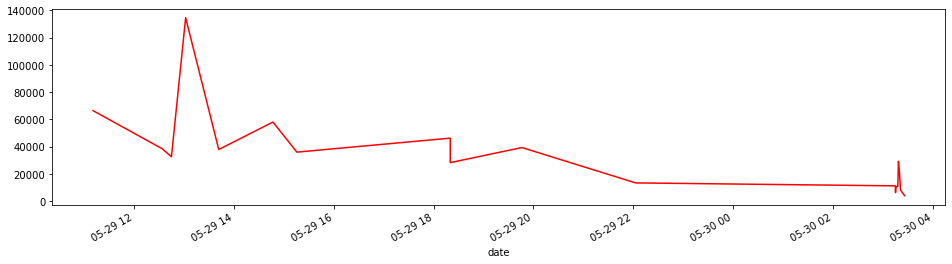

In [17]:
time_retweets = pd.Series(data=df["retweets"].values, index=df["date"])
time_retweets.plot(figsize=(16, 4), color="r")
plt.show()

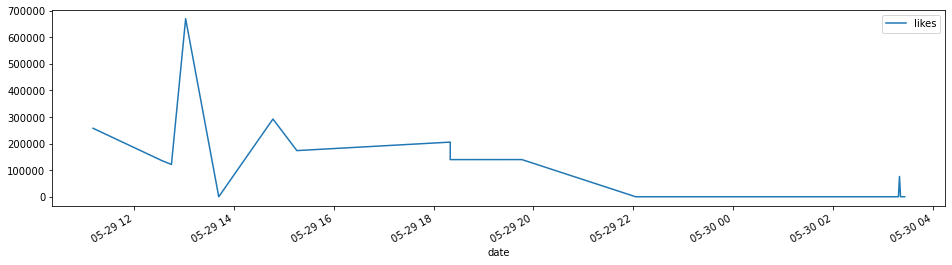

In [18]:
# Layered Time Series:
time_likes = pd.Series(data=df["likes"].values, index=df["date"])
time_likes.plot(figsize=(16, 4), label="likes", legend=True)

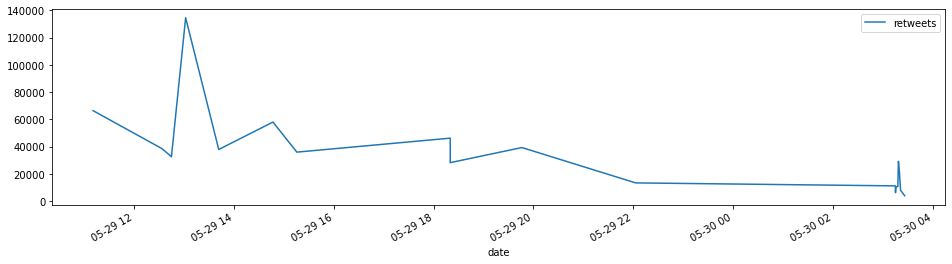

In [19]:
# time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
time_retweets.plot(figsize=(16, 4), label="retweets", legend=True)
plt.show()

In [20]:
from textblob import TextBlob
import re

In [21]:
class TweetAnalyzer:
    """
    Functionality for analyzing and categorizing content from tweets.
    """

    def clean_tweet(self, tweet):
        return " ".join(
            re.sub(
                "(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet
            ).split()
        )

    def analyze_sentiment(self, tweet):
        analysis = TextBlob(self.clean_tweet(tweet))

        if analysis.sentiment.polarity > 0:
            return 1
        elif analysis.sentiment.polarity == 0:
            return 0
        else:
            return -1

    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=["tweets"])

        df["id"] = np.array([tweet.id for tweet in tweets])
        df["len"] = np.array([len(tweet.text) for tweet in tweets])
        df["date"] = np.array([tweet.created_at for tweet in tweets])
        df["source"] = np.array([tweet.source for tweet in tweets])
        df["likes"] = np.array([tweet.favorite_count for tweet in tweets])
        df["retweets"] = np.array([tweet.retweet_count for tweet in tweets])

        return df

In [22]:
if __name__ == "__main__":

    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()

    api = twitter_client.get_twitter_client_api()

    tweets = api.user_timeline(screen_name="realDonaldTrump", count=200)

    df = tweet_analyzer.tweets_to_data_frame(tweets)
    df["sentiment"] = np.array(
        [tweet_analyzer.analyze_sentiment(tweet) for tweet in df["tweets"]]
    )

    print(df.head(10))

                                              tweets                   id  \
0  RT @ScottAdamsSays: Malaria drug and zinc, the...  1266571665204527109   
1  RT @YoungDems4Trump: In Democrat cities you ca...  1266570449431003138   
2  RT @YoungDems4Trump: So sad. This poor busines...  1266570411678019584   
3   Time for a change! #2020 https://t.co/AECy2GBfys  1266570099454103553   
4  RT @TallahForTrump: Trump spoke at my church i...  1266569778770182151   
5  RT @TheRightMelissa: In an ironic twist of fat...  1266569597689438215   
6  RT @Jim_Jordan: Right on! \n\nWe don’t have to...  1266568994242260992   
7  RT @Scavino45: “Texas AG Ken Paxton: Trump is ...  1266568894568955909   
8  RT @Jim_Jordan: Twitter “fact checks” Presiden...  1266568857201913862   
9  RT @WhiteHouse: "I want to express our Nation'...  1266490262181818371   

   len                date              source  likes  retweets  sentiment  
0   98 2020-05-30 03:26:31  Twitter for iPhone      0      4179         -1 